# Multi Layer Perceptron - Definición y entrenamiento - Toy Example

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Activación
def softplus(z):
    # softplus(z) = log(1 + e^z)
    return np.log1p(np.exp(z))

In [3]:
x_data = np.array([0.0,0.128,0.241,0.342,0.501,0.627,0.827,0.925,1.0])
y_data = np.array([0.0,0.195,0.485,0.844, 1, 0.919, 0.343,0.187,0.0])

In [4]:
print(f'x_data shape: {x_data.shape}')
print(f'y_data shape: {y_data.shape}')

x_data shape: (9,)
y_data shape: (9,)


## Paso a paso

In [5]:
W1 = np.array([[-34.4,-2.52]])
b1 = np.array([2.14, 1.29])

In [6]:
print(f'W1 shape: {W1.shape}')
print(f'b1 shape: {b1.shape}')

W1 shape: (1, 2)
b1 shape: (2,)


In [24]:
x = np.linspace(0,1,11)
N = len(x)
x_column = x.reshape(N,1) # (N,1)
z = np.matmul(x_column,W1) + b1 # (N,2)
print(z)

[[0.         0.        ]
 [0.04887014 0.03148458]
 [0.09774028 0.06296917]
 [0.14661043 0.09445375]
 [0.19548057 0.12593833]
 [0.24435071 0.15742292]
 [0.29322085 0.1889075 ]
 [0.342091   0.22039208]
 [0.39096114 0.25187666]
 [0.43983128 0.28336125]
 [0.48870142 0.31484583]]


In [8]:
a = softplus(z)
print(a)

[[2.25123260e+00 1.53315853e+00]
 [2.41008454e-01 1.34118303e+00]
 [8.70068521e-03 1.16146202e+00]
 [2.80162691e-04 9.95376051e-01]
 [8.98454668e-06 8.44054916e-01]
 [2.88087915e-07 7.08259676e-01]
 [9.23744962e-09 5.88295071e-01]
 [2.96195917e-10 4.83972640e-01]
 [9.49742886e-12 3.94633650e-01]
 [3.04532068e-13 3.19226140e-01]
 [9.76472493e-15 2.56417833e-01]]


In [9]:
W2 = np.array([[-1.30],[2.28]])
b2 = np.array([-0.58])

In [10]:
a.shape

(11, 2)

In [11]:
W2.shape

(2, 1)

In [12]:
y_hat = np.matmul(a,W2) + b2
print(y_hat)

[[-0.01100092]
 [ 2.16458633]
 [ 2.05682252]
 [ 1.68909319]
 [ 1.34443353]
 [ 1.03483169]
 [ 0.76131275]
 [ 0.52345762]
 [ 0.31976472]
 [ 0.1478356 ]
 [ 0.00463266]]


## Hacemos una función

In [13]:
def f(x, W1, b1, W2, b2):
    """
    x: array shape (N,)
    W1: (1,2), b1: (2,), W2: (1,2), b2: escalar
    Devuelve:
      a: activaciones primera capa, shape (2,N)
      y:  salida final, shape (N,)
    """
    N = len(x)
    x_column = x.reshape(N,1) # (N,1)
    z = np.matmul(x_column,W1) + b1 # (N,2)
    a = softplus(z) # (N,2)
    y_hat = np.matmul(a,W2) + b2 # (N,)
    return a, y_hat

In [14]:
# Parámetros de la red
W1 = np.array([[-34.4,-2.52]])
b1 = np.array([2.14, 1.29])
W2 = np.array([[-1.30],[2.28]])
b2 = np.array([-0.58])

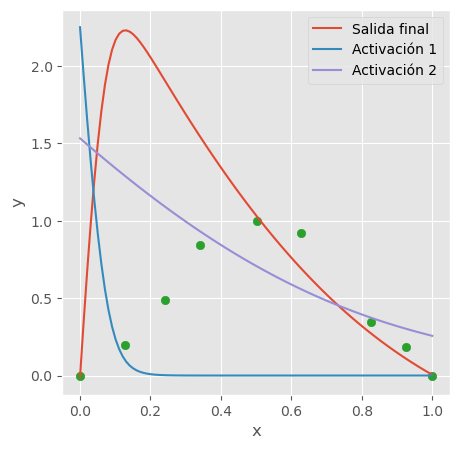

In [15]:
# Rango de x para graficar la red
x = np.linspace(0,1,100)

# Activaciones y salida final
a, y_hat = f(x, W1, b1, W2, b2)

# Gráficos
plt.figure(figsize=(5,5))
plt.scatter(x_data,y_data, color='tab:green')
plt.plot(x,y_hat, label = 'Salida final')
plt.plot(x,a[:,0], label = 'Activación 1')
plt.plot(x,a[:,1], label = 'Activación 2')
plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Entrenamiento

### Derivadas

La red es
$$\widehat{y}=\text{softplus}(xW_1+b_1)\,W_2+b_2$$
y la loss es
$$\text{MSE} = \frac1N\sum_{i=1}^N ( \hat y_i - y_i)^2$$

In [16]:
# Derivada de la softplus
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [17]:
# Forward (devuelve caché para backprop)

def forward(x, W1, b1, W2, b2):
    """
    x: (N,), W1: (1,2), b1: (2,), W2: (2,1), b2: escalar
    """
    N = x.shape[0]
    x_col = x.reshape(N, 1)            # (N,1)
    Z = x_col @ W1 + b1                # (N,2)
    A = softplus(Z)                    # (N,2)
    y_hat = (A @ W2 + b2).squeeze(-1)  # (N,)
    cache = (x_col, Z, A, y_hat)
    return y_hat, cache

In [19]:
# MSE + gradiente respecto a y_hat

def mse_and_grad(y_hat, y):
    diff = y_hat - y # (N,)
    N = y.shape[0]
    loss = (diff**2).mean()
    dL_dyhat = (2.0/N) * diff # (N,)
    return loss, dL_dyhat

In [47]:
# Backprop: gradientes de W1, b1, W2, b2

def backward(cache, dL_dyhat, W1, b1, W2, b2):
    x_col, Z, A, y_hat = cache
    N = y_hat.shape[0]
    dL_dyhat = dL_dyhat.reshape(N, 1) # (N,1)

    # Capa de salida
    dL_dW2 = A.T @ dL_dyhat # (2,1)
    dL_db2 = np.sum(dL_dyhat) # escalar

    # Hacia atrás a la capa oculta

    dL_dW1 = x_col.T @ (dL_dyhat @ W2.T * sigmoid(Z)) # (1,2)
    dL_db1 = np.sum(dL_dyhat @ W2.T * sigmoid(Z), axis=0) # (2,)

    grads = dict(dW1=dL_dW1, db1=dL_db1, dW2=dL_dW2, db2=dL_db2)
    return grads

In [48]:
# Entrenamiento (batch completo)

def train(x, y, W1, b1, W2, b2, lr=0.05, epochs=5000, print_every=10):
    losses = []
    for t in range(epochs):
        y_hat, cache = forward(x, W1, b1, W2, b2)
        loss, dL_dyhat = mse_and_grad(y_hat, y)
        grads = backward(cache, dL_dyhat, W1, b1, W2, b2)

        # Paso de gradiente
        W1 -= lr * grads['dW1']
        b1 -= lr * grads['db1']
        W2 -= lr * grads['dW2']
        b2 -= lr * grads['db2']

        losses.append(loss)
        if print_every and (t % print_every == 0):
            print(f'Epoch {t:6d} | loss={loss:.6f}')
    return (W1, b1, W2, b2), np.array(losses)

In [49]:
# Empezar aleatorio pequeño:
rng = np.random.default_rng()
W1 = rng.normal(scale=0.3, size=(1,2))
b1 = np.zeros(2)
W2 = rng.normal(scale=0.3, size=(2,1))
b2 = np.array(0.0)

In [50]:
# Entrenar
(lW1, lb1, lW2, lb2), losses = train(
    x_data, y_data,
    W1.copy(), b1.copy(), W2.copy(), b2.copy(),
    lr=0.1, epochs=50000, print_every=1000
)

Epoch      0 | loss=1.906503
Epoch   1000 | loss=0.136771
Epoch   2000 | loss=0.136076
Epoch   3000 | loss=0.135343
Epoch   4000 | loss=0.134024
Epoch   5000 | loss=0.124666
Epoch   6000 | loss=0.031017
Epoch   7000 | loss=0.011539
Epoch   8000 | loss=0.010612
Epoch   9000 | loss=0.010029
Epoch  10000 | loss=0.009651
Epoch  11000 | loss=0.009397
Epoch  12000 | loss=0.009222
Epoch  13000 | loss=0.009098
Epoch  14000 | loss=0.009006
Epoch  15000 | loss=0.008937
Epoch  16000 | loss=0.008882
Epoch  17000 | loss=0.008838
Epoch  18000 | loss=0.008800
Epoch  19000 | loss=0.008767
Epoch  20000 | loss=0.008737
Epoch  21000 | loss=0.008710
Epoch  22000 | loss=0.008684
Epoch  23000 | loss=0.008659
Epoch  24000 | loss=0.008634
Epoch  25000 | loss=0.008610
Epoch  26000 | loss=0.008586
Epoch  27000 | loss=0.008562
Epoch  28000 | loss=0.008538
Epoch  29000 | loss=0.008515
Epoch  30000 | loss=0.008490
Epoch  31000 | loss=0.008466
Epoch  32000 | loss=0.008442
Epoch  33000 | loss=0.008417
Epoch  34000 |

In [51]:
print("Parámetros aprendidos:")
print("W1 :\n", lW1)
print("b1 :\n", lb1)
print("W2 :\n", lW2)
print("b2 :\n", lb2)
print("Loss final :\n", losses[-1])

Parámetros aprendidos:
W1 :
 [[ 4.51039665 -3.13947493]]
b1 :
 [-2.4409729   2.09915209]
W2 :
 [[-1.20259889]
 [-1.33553575]]
b2 :
 2.9674510885262824
Loss final :
 0.007953979088371895


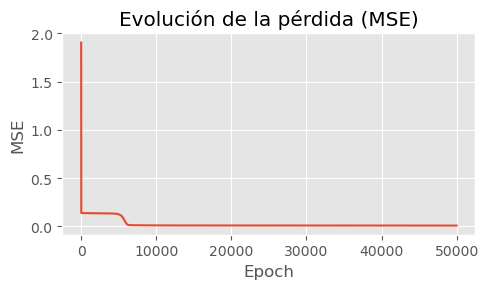

In [52]:
# Curva de pérdida
plt.figure(figsize=(5,3))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Evolución de la pérdida (MSE)')
plt.tight_layout()
plt.show()

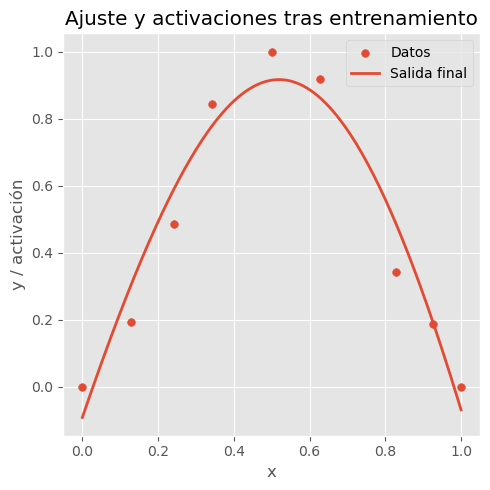

In [53]:
# Visualización final: datos, salida y activaciones

x = np.linspace(0, 1, 200)
y_hat, cache = forward(x, lW1, lb1, lW2, lb2)
_, Z, A, _ = cache # A: (200,2)

plt.figure(figsize=(5,5))
plt.scatter(x_data, y_data, label='Datos', s=30)
plt.plot(x, y_hat, label='Salida final', linewidth=2)
#plt.plot(x, A[:,0], label='Activación 1', alpha=0.9)
#plt.plot(x, A[:,1], label='Activación 2', alpha=0.9)
plt.legend()
plt.xlabel('x')
plt.ylabel('y / activación')
plt.title('Ajuste y activaciones tras entrenamiento')
plt.tight_layout()
plt.show()